**Note: Distances between stations are measured in miles. (craw fly distance)

import

In [49]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

task 1

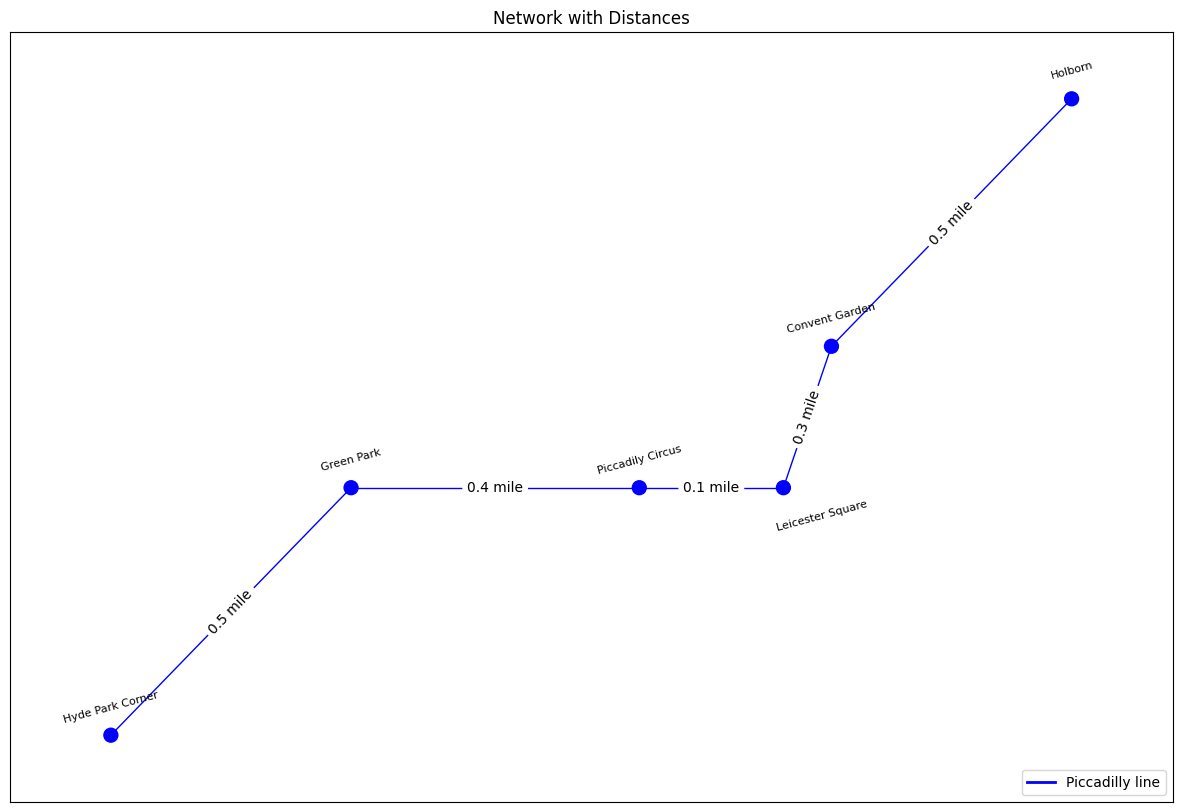

In [50]:
import matplotlib.patches as mpatches
import networkx as nx
import matplotlib.pyplot as plt


Graph = nx.Graph()

Graph.add_node('Hyde Park Corner', npos=(2,2), ccn='#0000ff')
Graph.add_node('Green Park', npos=(7, 9), ccn='#0000ff')
Graph.add_node('Piccadily Circus', npos=(13, 9), ccn='#0000ff')
Graph.add_node('Leicester Square', npos=(16, 9), ccn='#0000ff')
Graph.add_node('Convent Garden', npos=(17, 13), ccn='#0000ff')
Graph.add_node('Holborn', npos=(22, 20), ccn='#0000ff')

distances = {
    ('Hyde Park Corner', 'Green Park'): 0.5,
    ('Green Park', 'Piccadily Circus'): 0.4,
    ('Piccadily Circus', 'Leicester Square'): 0.1,
    ('Leicester Square', 'Convent Garden'): 0.3,
    ('Convent Garden', 'Holborn'): 0.5,
}

for (u, v), d in distances.items():
    Graph.add_edge(u, v, cce='#0000FF', distance=d)

# Get node and edge attributes
pos = nx.get_node_attributes(Graph, 'npos')
nodecolour = nx.get_node_attributes(Graph, 'ccn')
edgecolour = nx.get_edge_attributes(Graph, 'cce')
distances = nx.get_edge_attributes(Graph, 'distance')

nodearray = list(nodecolour.values())
edgearray = list(edgecolour.values())

plt.figure(figsize=(15, 10))

nx.draw_networkx_nodes(Graph, pos, node_color=nodearray, node_size=100)
nx.draw_networkx_edges(Graph, pos, edge_color=edgearray)

labels = {node: node for node in Graph.nodes()}
label_pos = {}
for node, (x, y) in pos.items():
    if node == 'Leicester Square':
        label_pos[node] = (x + 0.8, y - 0.8)  # Adjust label position for 'Leicester Square'
    else:
        label_pos[node] = (x, y + 0.8)

for node, (x, y) in label_pos.items():
    plt.text(x, y, node, fontsize=8, rotation=15, ha='center', va='center')

edge_labels = {(u, v): f'{d} mile' for (u, v), d in distances.items()}
nx.draw_networkx_edge_labels(Graph, pos, edge_labels=edge_labels)

# Add title
plt.title("Network with Distances")


# Create the legend with lines instead of patches
from matplotlib.lines import Line2D
blue_line = Line2D([0], [0], color='#0000ff', lw=2, label='Piccadilly line')

# Place the legend in the bottom right corner
plt.legend(handles=[blue_line], loc='lower right')\

# Show the plot
plt.show()


task 2

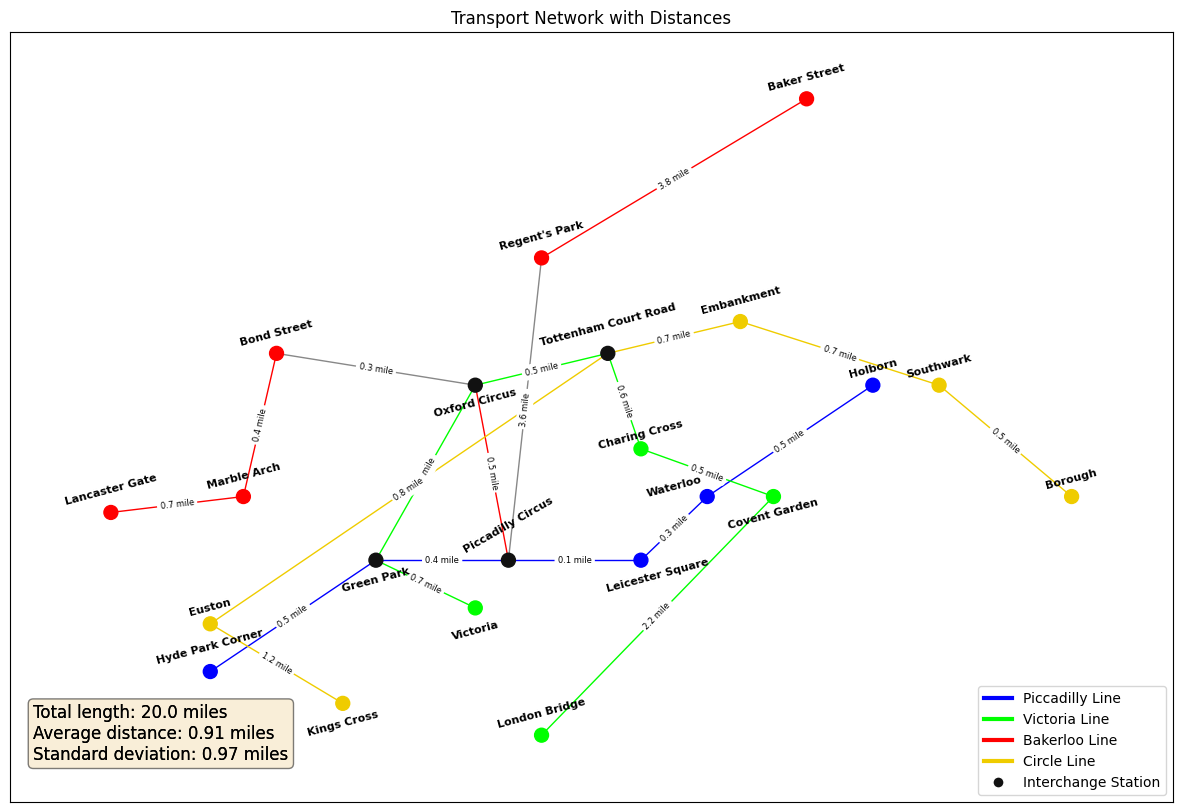

In [51]:
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import networkx as nx
import matplotlib.pyplot as plt

# Create the graph
Graph = nx.Graph()

# Define nodes with their positions and line colors
stations = {
    'Hyde Park Corner': (5,5),
    'Green Park': (10, 12), 
    'Piccadilly Circus': (14, 12),
    'Leicester Square': (18, 12), 
    'Covent Garden': (20, 16), 
    'Holborn': (25, 23),

    'Victoria': (13, 9),
    'Oxford Circus': (13, 23), 
    'Tottenham Court Road': (17, 25),
    'Charing Cross': (18, 19),
    'Waterloo': (22, 16),
    'London Bridge': (15, 1),

    'Baker Street': (23, 41), 
    'Regent\'s Park': (15, 31), 
    'Bond Street': (7, 25),
    'Marble Arch': (6, 16),
    'Lancaster Gate': (2, 15),

    'Kings Cross': (9, 3),
    'Euston': (5, 8),
    'Embankment': (21, 27),
    'Southwark': (27, 23), 
    'Borough': (31, 16),
}

# Define distances between connected stations
distances = {
    # Piccadilly line
    ('Hyde Park Corner', 'Green Park'): 0.5,
    ('Green Park', 'Piccadilly Circus'): 0.4,
    ('Piccadilly Circus', 'Leicester Square'): 0.1,
    ('Leicester Square', 'Covent Garden'): 0.3,
    ('Covent Garden', 'Holborn'): 0.5,

    # Victoria line
    ('Victoria', 'Green Park'): 0.7,
    ('Green Park', 'Oxford Circus'): 0.5,
    ('Oxford Circus', 'Tottenham Court Road'): 0.5,
    ('Tottenham Court Road', 'Charing Cross'): 0.6,
    ('Charing Cross', 'Waterloo'): 0.5,
    ('Waterloo', 'London Bridge'): 2.2,

    # Bakerloo line
    ('Baker Street', 'Regent\'s Park'): 3.8,
    ('Regent\'s Park', 'Piccadilly Circus'): 3.6,
    ('Oxford Circus', 'Piccadilly Circus'): 0.5,
    ('Bond Street', 'Oxford Circus'): 0.3,
    ('Bond Street', 'Marble Arch'): 0.4,
    ('Marble Arch', 'Lancaster Gate'): 0.7,

    # Circle line
    ('Kings Cross', 'Euston'): 1.2,
    ('Euston', 'Tottenham Court Road'): 0.8,
    ('Tottenham Court Road', 'Embankment'): 0.7,
    ('Embankment', 'Southwark'): 0.7,
    ('Southwark', 'Borough'): 0.5,
}

# Define the line colors for each edge
line_colors = {
    ('Hyde Park Corner', 'Green Park'): '#0000ff',
    ('Green Park', 'Piccadilly Circus'): '#0000ff',
    ('Piccadilly Circus', 'Leicester Square'): '#0000ff',
    ('Leicester Square', 'Covent Garden'): '#0000ff',
    ('Covent Garden', 'Holborn'): '#0000ff',

    ('Victoria', 'Green Park'): '#00FF00',  # Green Park to Victoria is Victoria line (green)
    ('Green Park', 'Oxford Circus'): '#00FF00',  # Green Park to Oxford Circus is Victoria line (green)
    ('Oxford Circus', 'Tottenham Court Road'): '#00FF00',
    ('Tottenham Court Road', 'Charing Cross'): '#00FF00',
    ('Charing Cross', 'Waterloo'): '#00FF00',
    ('Waterloo', 'London Bridge'): '#00FF00',

    ('Baker Street', 'Regent\'s Park'): '#FF0000',
    ('Piccadilly Circus', 'Regent\'s Park'): '#FF0000',
    ('Oxford Circus', 'Piccadilly Circus'): '#FF0000',  # This edge should remain red (Bakerloo Line)
    ('Oxford Circus', 'Bond Street'): '#FF0000',
    ('Bond Street', 'Marble Arch'): '#FF0000',
    ('Marble Arch', 'Lancaster Gate'): '#FF0000',

    ('Kings Cross', 'Euston'): '#EFCC00',
    ('Euston', 'Tottenham Court Road'): '#EFCC00',
    ('Tottenham Court Road', 'Embankment'): '#EFCC00',
    ('Embankment', 'Southwark'): '#EFCC00',
    ('Southwark', 'Borough'): '#EFCC00',
}


# Initialize the graph nodes with their positions and line colors
for station, pos in stations.items():
    if station in ['Hyde Park Corner', 'Green Park', 'Piccadilly Circus', 'Leicester Square', 'Covent Garden', 'Holborn']:
        color = '#0000ff'  # blue
    elif station in ['Victoria', 'Green Park', 'Oxford Circus', 'Tottenham Court Road', 'Charing Cross', 'Waterloo', 'London Bridge']:
        color = '#00FF00'  # green
    elif station in ['Baker Street', 'Regent\'s Park', 'Oxford Circus', 'Bond Street', 'Marble Arch', 'Lancaster Gate']:
        color = '#FF0000'  # red
    elif station in ['Kings Cross', 'Euston', 'Tottenham Court Road', 'Embankment', 'Southwark', 'Borough']:
        color = '#EFCC00'  # yellow
    else:
        color = '#888888'  # Default color

    Graph.add_node(station, npos=pos, ccn=color)

# Add the edges to the graph with their distances and colors
for (u, v), d in distances.items():
    line_color = line_colors.get((u, v), '#888888')
    Graph.add_edge(u, v, cce=line_color, distance=d)

pos = nx.get_node_attributes(Graph, 'npos')
nodecolor = nx.get_node_attributes(Graph, 'ccn')
edgecolor = nx.get_edge_attributes(Graph, 'cce')
distances = nx.get_edge_attributes(Graph, 'distance')

# Identify interchange stations (nodes with multiple lines)
interchange_stations = {
    'Oxford Circus', 'Piccadilly Circus', 'Tottenham Court Road', 'Green Park'
}

# Change the color of interchange stations
for station in interchange_stations:
    if station in nodecolor:
        nodecolor[station] = '#111'  # magenta for interchange stations

plt.figure(figsize=(15, 10))

# Draw nodes and edges
nx.draw_networkx_nodes(Graph, pos, node_color=list(nodecolor.values()), node_size=100)
nx.draw_networkx_edges(Graph, pos, edge_color=list(edgecolor.values()))

# Draw node labels
labels = {node: node for node in Graph.nodes()}
label_pos = {}
for key, value in pos.items():
    if key == 'Leicester Square':
        label_pos[key] = (value[0] + 0.5, value[1] - 2)
    elif key == 'Green Park':
        label_pos[key] = (value[0], value[1] - 2)
    elif key == 'Victoria':
        label_pos[key] = (value[0], value[1] - 2)
    elif key == 'Waterloo':
        label_pos[key] = (value[0] -3, value[1] )
    elif key == 'Covent Garden':
        label_pos[key] = (value[0] +2, value[1] - 2)
    elif key == 'Charing Cross':
        label_pos[key] = (value[0] , value[1])
    elif key == 'Oxford Circus':
        label_pos[key] = (value[0], value[1] - 2)
    elif key == 'Kings Cross':
        label_pos[key] = (value[0], value[1] - 2)
    else:
        label_pos[key] = (value[0], value[1] + 0.5)  

# Manually add labels with rotation
for key, value in label_pos.items():
    rotation_angle = 15  # Default rotation
    if key == 'Piccadilly Circus':
        rotation_angle = 30  # Increased rotation degree
    plt.text(value[0], value[1], key, fontsize=8, fontweight='bold', rotation=rotation_angle, ha='center')

# Draw edge labels with smaller font size
edge_labels = {(u, v): f'{d} mile' for (u, v), d in distances.items()}
nx.draw_networkx_edge_labels(Graph, pos, edge_labels=edge_labels, font_size=6)

plt.title("Transport Network with Distances")

# Create the keys with lines
legend_lines = [
    mlines.Line2D([], [], color='#0000ff', linewidth=3, label='Piccadilly Line'),
    mlines.Line2D([], [], color='#00FF00', linewidth=3, label='Victoria Line'),
    mlines.Line2D([], [], color='#FF0000', linewidth=3, label='Bakerloo Line'),
    mlines.Line2D([], [], color='#EFCC00', linewidth=3, label='Circle Line'),
    mlines.Line2D([], [], marker='o', markersize=8, color='w', markerfacecolor='#111', label='Interchange Station')
]

plt.legend(handles=legend_lines, loc='lower right')

distances = nx.get_edge_attributes(Graph, 'distance')
distance_values = list(distances.values())

# Total length of the transport network
total_length = round(sum(distance_values), 2)

# Average distance between the stations
average_distance = round(np.mean(distance_values), 2)

# Standard deviation of the distances between the stations
std_deviation = round(np.std(distance_values), 2)

# Create text box with the statistics
textstr = '\n'.join((
    f"Total length: {total_length} miles",
    f"Average distance: {average_distance} miles",
    f"Standard deviation: {std_deviation} miles"
))

# Place the text box in the lower left corner inside the plot with a border
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5, edgecolor='black')
plt.gcf().text(0.02, 0.05, textstr, fontsize=12, va='bottom', transform=plt.gca().transAxes, bbox=props)
plt.gcf().text(0.02, 0.05, textstr, fontsize=12, va='bottom', transform=plt.gca().transAxes)


plt.show()


task 3

In [52]:

distances = nx.get_edge_attributes(Graph, 'distance')
distance_values = list(distances.values())

# Total length of the transport network
total_length = round(sum(distance_values), 2)

# Average distance between the stations
average_distance = round(np.mean(distance_values), 2)

# Standard deviation of the distances between the stations
std_deviation = round(np.std(distance_values), 2)

print(f"Total length of the transport network: {total_length} miles")
print(f"Average distance between the stations: {average_distance} miles")
print(f"Standard deviation of the distances between the stations: {std_deviation} miles")


Total length of the transport network: 20.0 miles
Average distance between the stations: 0.91 miles
Standard deviation of the distances between the stations: 0.97 miles
